In [18]:
!cd ..; cd ENV; activate

In [1]:
import sys
sys.path.insert(0, '../')
import fconcrete as fc
import pandas as pd
import matplotlib.pyplot as plt
import ezdxf
import numpy as np

In [2]:
base, altura, comprimento = 20, 40, 300
area_laje = comprimento*comprimento
carga_na_laje = fc.to_unit(5, "kN/m**2", "kN/cm**2")
carga_na_viga = -(carga_na_laje*area_laje/comprimento)/4
carga_distribuida_na_viga = fc.Load.UniformDistributedLoad(carga_na_viga, x_begin=0, x_end=comprimento)
n1 = fc.Node.SimpleSupport(x=0, length=20)
n2 = fc.Node.SimpleSupport(x=30, length=20)
n3 = fc.Node.SimpleSupport(x=200, length=20)
n4 = fc.Node.SimpleSupport(x=300, length=20)
beam_element1 = fc.BeamElement([n1, n2], section=fc.Rectangle(20, 50), material=fc.Concrete(30, 1))
beam_element2 = fc.BeamElement([n2, n3], section=fc.Rectangle(20, 80), material=fc.Concrete(30, 1))
beam_element3 = fc.BeamElement([n3, n4], section=fc.Rectangle(20, 40), material=fc.Concrete(30, 1))
beam = fc.ConcreteBeam(
    fck = 30,
    loads = [carga_distribuida_na_viga],
    beam_elements = [beam_element1, beam_element2, beam_element3],
    division = 200,
    consider_own_weight = True,

)

self = beam

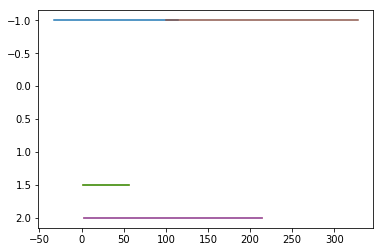

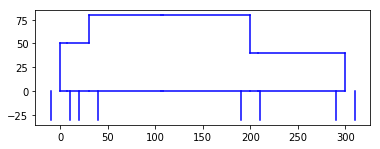

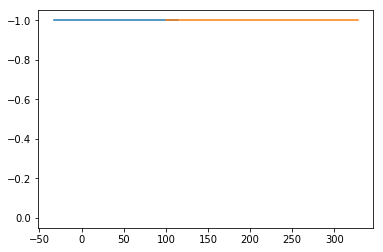

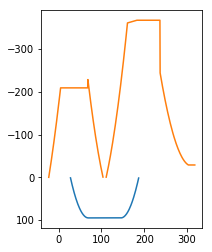

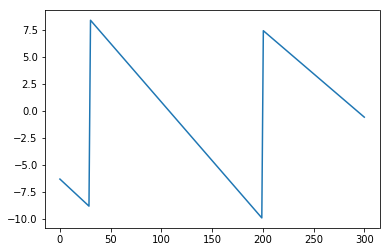

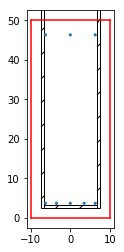

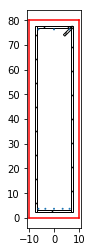

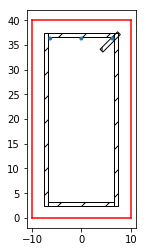

In [3]:
self.plotAllInfo(transversal_plot_positions=[20, 150, 250])

In [6]:
import datetime


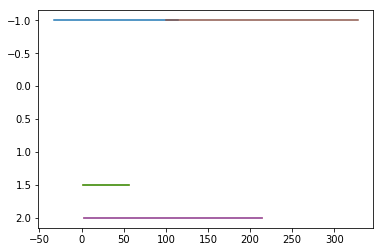

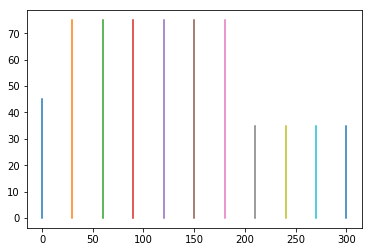

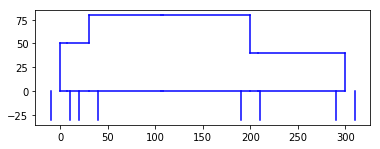

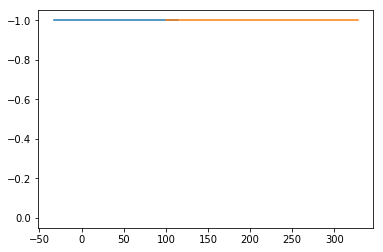

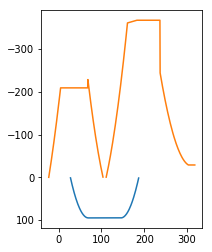

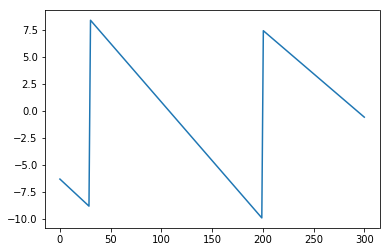

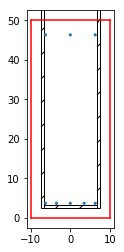

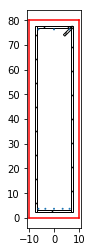

In [11]:
file_name = False
file_name = datetime.datetime.now().strftime("%d-%m-%Y %H-%m-%S") if file_name == False else file_name
column_height = 30
gap = 50
scale_y_long_bar = 10
max_height = max([ section.height for section in self.beam_elements.sections ])
transversal_plot_positions = [20, 150]


# Positive Long bar draw
positive_long_steel_bar = fc.LongSteelBars(self.long_steel_bars[self.long_steel_bars.areas > 0])
start_y_bottom = -max(positive_long_steel_bar.areas)*scale_y_long_bar - 2*gap - max_height
_, msp = self.long_steel_bars.plot(scale_y=scale_y_long_bar, xy_position=(0,start_y_bottom))

# Plot transversal bars
start_y = gap + max_height
_, msp = self.transv_steel_bars.plotLong(msp=msp, xy_position=(0,-start_y))

# Beam draw
max_height = max([ section.height for section in self.beam_elements.sections ])
start_y = column_height
_, msp = self.plot(msp=msp, column_height=column_height, xy_position=(0,start_y))

# Negative Long Bar draw
negative_long_steel_bar = fc.LongSteelBars(self.long_steel_bars[self.long_steel_bars.areas < 0])
start_y += max_height + max(abs(negative_long_steel_bar.areas))*scale_y_long_bar + gap
_, msp = negative_long_steel_bar.plot(msp=msp, scale_y=scale_y_long_bar, xy_position=(0,start_y))


# Momentum decalaged draw
x, mm, mn = self.long_steel_bars_solution_info.getDecalagedMomentumDesignDiagram()
mm, mn = mm[np.invert(np.isnan(mm))], mn[np.invert(np.isnan(mn))]
minimum_momentum, maximum_momentum = abs(min(min(mn), min(mm), 0)), abs(max(max(mn), max(mm), 0))
start_y += minimum_momentum + gap

_, msp = self.long_steel_bars_solution_info.plotDecalagedMomentumDesignDiagram(msp=msp, xy_position=(0,start_y))

# Shear draw

#x, sd = self.getShearDesignDiagram()
#minimum_shear, maximum_shear = abs(min(min(sd), min(sd), 0)), abs(max(max(sd), max(sd), 0))
start_y += maximum_momentum + gap
ax, msp = self.plotShearDesignDiagram(msp=msp, xy_position=(0,start_y))

transversal_x = self.length
for position in transversal_plot_positions:
    transversal_x += gap + self.getBeamElementInX(position)[1].section.width(0)
    ax, msp = self.plotTransversalInX(position, msp=msp, xy_position=(transversal_x, 0))

viewport_height = start_y+abs(start_y_bottom)
msp.doc.set_modelspace_vport(height=viewport_height, center=(transversal_x/2, start_y_bottom+viewport_height/2))

msp.doc.saveas("FConcrete Draw {}.dxf".format(file_name))


In [30]:
section = self.getBeamElementInX(20)[1].section.width(0)

In [29]:
section

20.0

In [11]:
ax, msp = self.plotTransversalInX(200)
ax, msp = self.plotTransversalInX(300, msp=msp, xy_position=(100, 0))
msp.doc.saveas("sections.dxf")

dict_keys(['msp', 'scale_y', 'xy_position'])


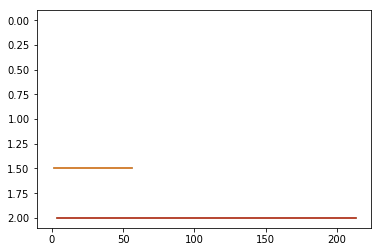

dict_keys(['msp', 'scale_y', 'xy_position'])


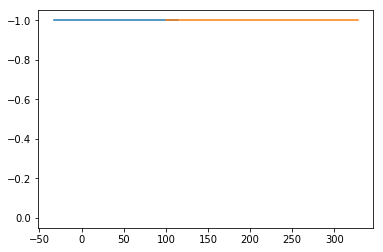

In [ ]:
self.long_steel_bars_solution_info.plotLon(msp=msp, xy_position=(0,start_y))

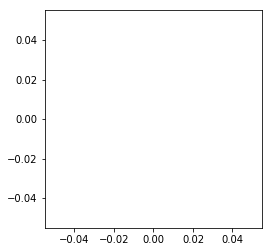

In [8]:
_, ax = fc.helpers.getAxis()
ax.set_aspect("equal")

In [40]:

splits_start = splits_end = []
last = start = 0
y_data = xy_data[:, 1]
for index, y in enumerate(y_data):
    y_before = y_data[index-1] if index>0 else 1
    y_after = y_data[index+1] if index<len(y_data)-1 else np.nan
    if np.isnan(y_before) and not np.isnan(y):
        splits_start = [*splits_start, index]
    elif np.isnan(y_after) and not np.isnan(y):
        splits_end = [*splits_end, index]


array_of_xy_data = []
for start, end in zip(splits_start, splits_end):
    array_of_xy_data = [*array_of_xy_data, xy_data[start:end]]

(array([0., 0.]), array([ 0., 50.]))